<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Assignment_Electric_Field_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electric field of a charge distribution

##A

Suppose we have a distribution of charges and we want to calculate
the resulting electric field.  One way to do this is to first calculate the
electric potential $\phi$ and then take its gradient.  For a point
charge $q$, the electric potential at a distance $r$ from the
point charge is:

$\phi=\frac{q}{4\pi\epsilon_0 r}$

and the electric field is:

$\vec{E} =-\nabla\phi$.

Assume you have a charge of 1 Coulomb at the origin.  Calculate the
  resulting electric potential on a $1\,\textrm{m}\times1\,\textrm{m}$
  square plane with a spacing of 1 cm surrounding the point charge.  Show the potential on a density plot.
  
Note that you will need to be careful when calculating the electric potential close to, or at the same position as, the point charge. My suggestion is to write as a separate function for calculating the potential, and if the potential is being calculated at a point too close to the charge, assign it a maximum value or calculate it for a distance which is slightly further away.  No matter what you do, your plot of the electrostatic potential should look reasonable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables.  Define two arrays, one with the position of the charge and another with the magnitude.  You could do this in the main block of the code, but it will make it easier for part C to do it this way.

Also define the min and max values of the array, along with the spacing.

In [ ]:
charge_position = np.array([[0.0,0.0]]) #in meters
charge_value    = np.array([1.0]) #in Coulombs
x_min           = -1.0 #in meters
x_max           =  1.0 #in meters
y_min           = -1.0 #in meters
y_max           =  1.0 #in meters
dx              = .01  #in meters
dy              = .01  #in meters

Physical constants:  Here I'll use Coulomb's constant which is:

$k = \frac{1}{4 \pi \epsilon_0}$

In [ ]:
k = 9.0e9 #in N m^2/C^2

Define a function for calculating the electrostatic potential.  Take as input the charge strength, location, and the X and Y grids where the potential will be calculated.  Return a grid of the potential.

In [ ]:
def elect_potential(q,q_loc,X,Y):
  R = np.sqrt((X-q_loc[0])**2+(Y-q_loc[1])**2) #calculate the distance of each grid point to the charge
  mindist = np.sqrt(dx**2 + dy**2) * 10
  '''My approach to the singularity:  calculate a minimum distance and for any 
  points that have an R value below that, replace that with the min dist.  Note that I'm going to 
  do it with an interesting numpy friendly way to do this, in which I tell python to give me all of the elements with an 
  R value below the threshold and replace those values with the threshold, but you could easily do this with a for loop.
  There are other ways you could approach this problem.
  '''
  R[R < mindist]  = mindist 
  potential = k * q / R
  return potential

First, set up the grid arrays you will need for the X and Y coordinates, along with the potential which I'll call phi.  Initialize phi to zero, then loop over all of my charges and add the potential from that charge to phi.

Finally, make a heat map of the potential.

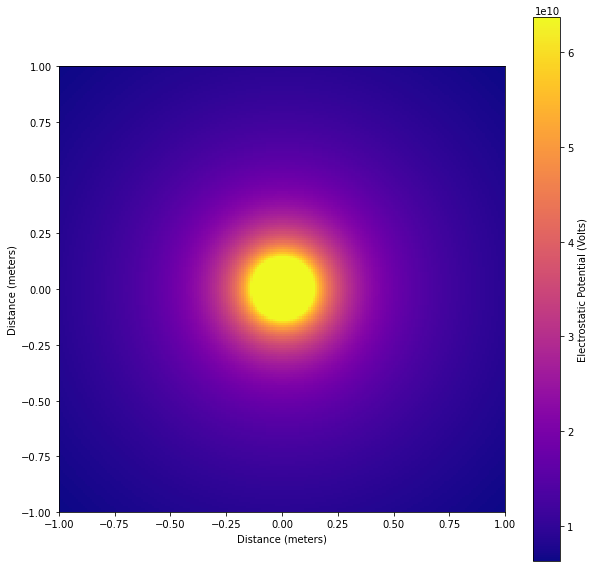

In [ ]:
x = np.arange(x_min,x_max+dx,dx)
y = np.arange(y_min,y_max+dy,dy)
X, Y = np.meshgrid(x,y)

phi = np.zeros([len(x),len(y)])

for i in range(len(charge_value)):
  phi += elect_potential(charge_value[i],charge_position[i],X,Y)

plt.figure(figsize=(10,10)) #sets the size of the plot we are going to make.  Feel free to change this
plt.pcolormesh(X,Y,phi,cmap='plasma') #Makes a heatmap for the data with Z being the dependent variable and X and Y the independent variables.  Sets the way colors are defined. 
plt.colorbar(label='Electrostatic Potential (Volts)') #Makes a colorbar and labels it
plt.xlabel('Distance (meters)')
plt.ylabel('Distance (meters)')
plt.axis('square')
plt.show() #Shows the plot

##B
Now calculate the gradient of the potential with respect
  to $x$ and $y$ and hence find the electric field in the $xy$ plane.  Make
  a visualization of the field also.  Overlay the electric field on a plot of the electric potential and ensure that the result is what you would expect from your E&M class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables.  Define two arrays, one with the position of the charge and another with the magnitude.  You could do this in the main block of the code, but it will make it easier for part C to do it this way.

Also define the min and max values of the array, along with the spacing.

In [ ]:
charge_position = np.array([[0.0,0.0]]) #in meters
charge_value    = np.array([1.0]) #in Coulombs
x_min           = -1.0 #in meters
x_max           =  1.0 #in meters
y_min           = -1.0 #in meters
y_max           =  1.0 #in meters
dx              = .01  #in meters
dy              = .01  #in meters

Physical constants:  Here I'll use Coulomb's constant which is:

$k = \frac{1}{4 \pi \epsilon_0}$

In [ ]:
k = 9.0e9 #in N m^2/C^2

Define a function for calculating the electrostatic potential.  Take as input the charge strength, location, and the X and Y grids where the potential will be calculated.  Return a grid of the potential.

In [ ]:
def elect_potential(q,q_loc,X,Y):
  R = np.sqrt((X-q_loc[0])**2+(Y-q_loc[1])**2) #calculate the distance of each grid point to the charge
  mindist = np.sqrt(dx**2 + dy**2) * 2
  '''My approach to the singularity:  calculate a minimum distance and for any 
  points that have an R value below that, replace that with the min dist.  Note that I'm going to 
  do it with an interesting numpy friendly way to do this, in which I tell python to give me all of the elements with an 
  R value below the threshold and replace those values with the threshold, but you could easily do this with a for loop.
  There are other ways you could approach this problem.
  '''
  R[R < mindist]  = mindist 
  potential = k * q / R
  return potential

First, set up the grid arrays you will need for the X and Y coordinates, along with the potential which I'll call phi.  Initialize phi to zero, then loop over all of my charges and add the potential from that charge to phi.

Once done, use the gradient function to add calculate the E-field in the X and Y direction (don't forget the negative sign!).  Then add these lines to previous plot using the streamplot function.

Finally, make a heat map of the potential.

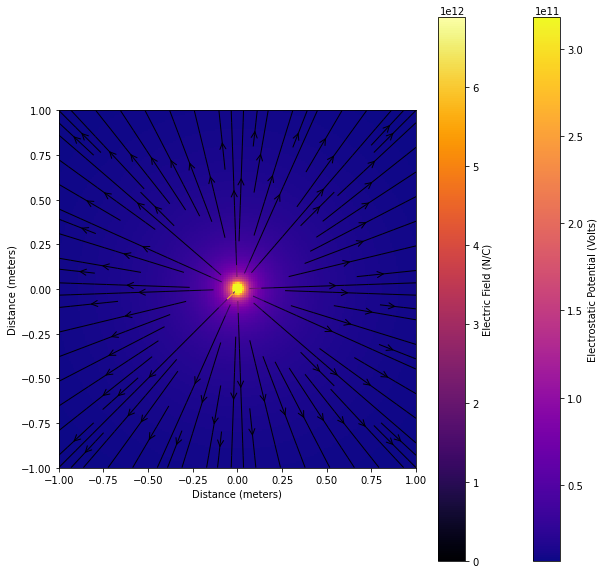

In [ ]:
x = np.arange(x_min,x_max+dx,dx)
y = np.arange(y_min,y_max+dy,dy)
X, Y = np.meshgrid(x,y)

phi = np.zeros([len(x),len(y)])

for i in range(len(charge_value)):
  phi += elect_potential(charge_value[i],charge_position[i],X,Y)

E_Y, E_X = np.gradient(phi,y,x)
E_Y *= -1.0
E_X *= -1.0

plt.figure(figsize=(10,10)) #sets the size of the plot we are going to make.  Feel free to change this
plt.pcolormesh(X,Y,phi,cmap='plasma') #Makes a heatmap for the data with Z being the dependent variable and X and Y the independent variables.  Sets the way colors are defined. 
plt.colorbar(label='Electrostatic Potential (Volts)') #Makes a colorbar and labels it
colors = np.sqrt(E_Y**2+E_X**2)
plt.streamplot(x,y,E_X,E_Y,color=colors,cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5)
plt.colorbar(label='Electric Field (N/C)')
plt.xlabel('Distance (meters)')
plt.ylabel('Distance (meters)')
plt.axis('square')
plt.show() #Shows the plot

##C
Add three to ten more point charges to your system at locations of your choosing.  The charges can have any strength, but should be on the order of $\pm$1 Coulomb.  Repeat the above procedure and make a plot of the electric field overlayed on the electric potential for this charge distribution.  Try to make an interesting and fun looking plot!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables.  Define two arrays, one with the position of the charge and another with the magnitude.  You could do this in the main block of the code, but it will make it easier for part C to do it this way.

Also define the min and max values of the array, along with the spacing.

In [ ]:
charge_position = np.array([[0.0,0.0],[0.5,0.5],[-0.5,0.5],[0,-0.75],[.2,-.7],[.4,-.6],[-.2,-.7],[-.4,-.6]]) #in meters
charge_value    = np.array([1.0,-2.0,-2.0,0.5,0.5,0.5,0.5,0.5]) #in Coulombs
x_min           = -1.0 #in meters
x_max           =  1.0 #in meters
y_min           = -1.0 #in meters
y_max           =  1.0 #in meters
dx              = .01  #in meters
dy              = .01  #in meters

Physical constants:  Here I'll use Coulomb's constant which is:

$k = \frac{1}{4 \pi \epsilon_0}$

In [ ]:
k = 9.0e9 #in N m^2/C^2

Define a function for calculating the electrostatic potential.  Take as input the charge strength, location, and the X and Y grids where the potential will be calculated.  Return a grid of the potential.

In [ ]:
def elect_potential(q,q_loc,X,Y):
  R = np.sqrt((X-q_loc[0])**2+(Y-q_loc[1])**2) #calculate the distance of each grid point to the charge
  mindist = np.sqrt(dx**2 + dy**2) * 2
  '''My approach to the singularity:  calculate a minimum distance and for any 
  points that have an R value below that, replace that with the min dist.  Note that I'm going to 
  do it with an interesting numpy friendly way to do this, in which I tell python to give me all of the elements with an 
  R value below the threshold and replace those values with the threshold, but you could easily do this with a for loop.
  There are other ways you could approach this problem.
  '''
  R[R < mindist]  = mindist 
  potential = k * q / R
  return potential

First, set up the grid arrays you will need for the X and Y coordinates, along with the potential which I'll call phi.  Initialize phi to zero, then loop over all of my charges and add the potential from that charge to phi.

Once done, use the gradient function to add calculate the E-field in the X and Y direction (don't forget the negative sign!).  Then add these lines to previous plot using the streamplot function.

Finally, make a heat map of the potential.

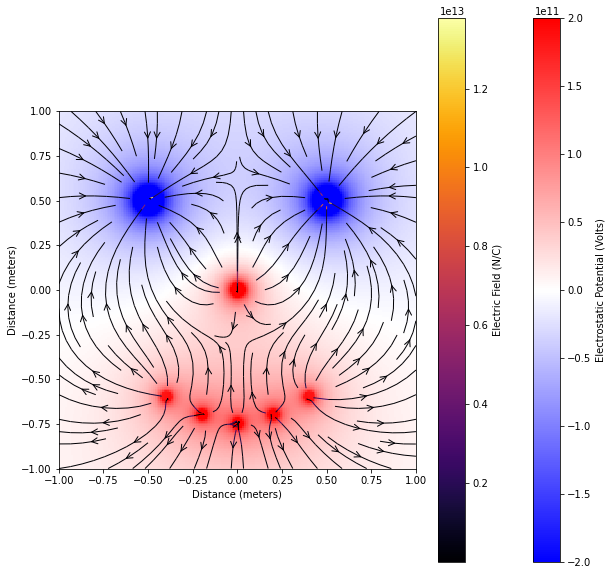

In [ ]:
x = np.arange(x_min,x_max+dx,dx)
y = np.arange(y_min,y_max+dy,dy)
X, Y = np.meshgrid(x,y)

phi = np.zeros([len(x),len(y)])

for i in range(len(charge_value)):
  phi += elect_potential(charge_value[i],charge_position[i],X,Y)

E_Y, E_X = np.gradient(phi,y,x)
E_Y *= -1.0
E_X *= -1.0

plt.figure(figsize=(10,10)) #sets the size of the plot we are going to make.  Feel free to change this
plt.pcolormesh(X,Y,phi,cmap='bwr',vmin = -2e11,vmax=2e11) #Makes a heatmap for the data with Z being the dependent variable and X and Y the independent variables.  Sets the way colors are defined. 
plt.colorbar(label='Electrostatic Potential (Volts)') #Makes a colorbar and labels it
colors = np.sqrt(E_Y**2+E_X**2)
plt.streamplot(x,y,E_X,E_Y,color=colors,cmap=plt.cm.inferno,linewidth=1,arrowstyle='->',density=1,arrowsize=1.5)
plt.colorbar(label='Electric Field (N/C)')
plt.xlabel('Distance (meters)')
plt.ylabel('Distance (meters)')
plt.axis('square')
plt.show() #Shows the plot

Note that I changed the colorbar and the range of it using the vmin and vmax options to make the colorbar centered at zero.

#Grading (65 points)

* Part A: 10 points.  Did you write well written code that is easy to follow?
* Part A: 5 points. Are there units on all of your constants and variables?
* Part A: 5 points.  Did you deal come up with some sort of method for dealing with the singularity at r=0?  For example, defining the potential at r=0 as being the same as it a nearby point? No matter what you did you should NOT be dividing by zero.
* Part A: 10 points.  Did you properly calculate the electric potential and plot it? You should have a 2D density plot for the potential.
* Part B: 10 points.  Did you properly calculate the gradient in 2D?
* Part B: 5 points. Did you plot the gradient properly? Is it overlayed on the electric potential plot?
* Part C: 10 points.  Did you add additional point charges to your system?
* Part C: 10 points.  Is the electric field and potential you plotted correct for the charges you added?